In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\\college\\ML pratical\\EX-08\\P8-CancerData.csv")
data = data.drop(data.columns[-1], axis=1)



In [3]:
features = data.iloc[:, 2:]

In [4]:

features.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750


In [5]:
wss=[]
for i in range(1,10):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(features)
    wss.append(Kmeans.inertia_)

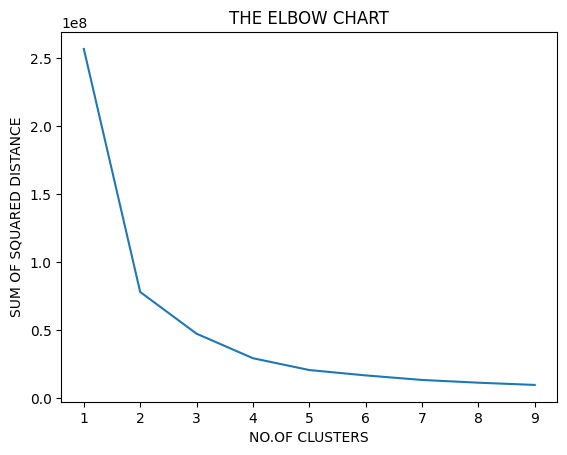

In [6]:
plt.plot(range(1,10),wss)
plt.title("THE ELBOW CHART")
plt.xlabel("NO.OF CLUSTERS")
plt.ylabel("SUM OF SQUARED DISTANCE")
plt.show()

In [7]:
Kmeans=KMeans(n_clusters=2)
label=Kmeans.fit_predict(features)


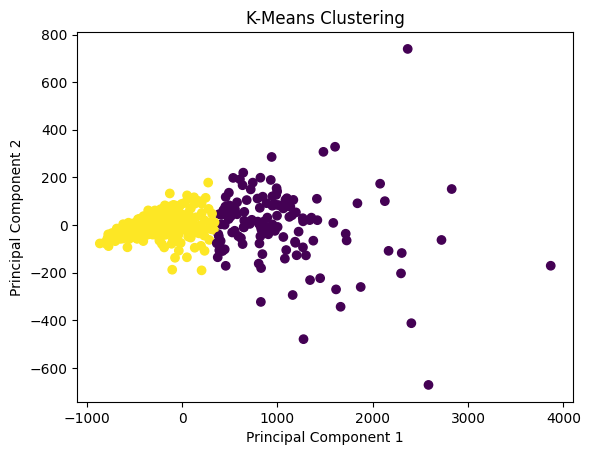

In [8]:
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Create a scatter plot of the two principal components with cluster colors
plt.scatter(components[:, 0], components[:, 1], c=label, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
